In [1]:
from tensorflow import keras
from keras import layers
import io
import time
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
ukloaded = files.upload()

Saving lap1.csv to lap1.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lap2.csv to lap2.csv


In [ ]:

data1 = pd.read_csv(io.BytesIO(ukloaded['lap1.csv']))
data2=pd.read_csv(io.BytesIO(uploaded['lap2.csv']))

In [ ]:

v2vd=pd.concat([data1,data2],ignore_index=True)
nn=pd.DataFrame(v2vd.loc[13000:31000,[' Sender Speed(km/h)']])
from keras import metrics
m = keras.metrics.RootMeanSquaredError()
metrics1=[metrics.mae,metrics.mse,m]
metrics=metrics1
selected_features = [' Sender Speed(km/h)']

In [ ]:
dataset = nn[selected_features].values
# Scale the dataset between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
# Split the data into training and testing sets
train_size = int(len(dataset) * 0.8)
train_data1 = dataset[:train_size]
test_data1 = dataset[train_size:]
train_data = scaler.fit_transform(train_data1)
test_data = scaler.transform(test_data1)
# Create sequences for LSTM training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 20 # Length of input sequence
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
Adam=keras.optimizers.Adam(learning_rate=0.009)
# Build the LSTM mode

model = Sequential()
model.add(LSTM(60, activation='relu', return_sequences=True,  input_shape=(seq_length, len(selected_features))))
model.add(LSTM(units=60))
model.add(Dense(1))
model.compile(optimizer=Adam, loss=['mean_squared_error'],metrics=metrics1)

# Train the model
start = time.time()
history=model.fit(X_train, y_train, epochs=150, batch_size=32)
end = time.time()
total_time_lstm = end - start
print("Time for fitting lstm:   "+ str(total_time_lstm))
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss:}')
print(f'Test Loss: {test_loss:}')

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

Epoch 1/150
450/450 [==============================] - 17s 29ms/step - loss: 0.0172 - mean_absolute_error: 0.0339 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1175
Epoch 2/150
450/450 [==============================] - 13s 29ms/step - loss: 3.5889e-04 - mean_absolute_error: 0.0076 - mean_squared_error: 3.5889e-04 - root_mean_squared_error: 0.0189
Epoch 3/150
450/450 [==============================] - 13s 29ms/step - loss: 2.2365e-04 - mean_absolute_error: 0.0052 - mean_squared_error: 2.2365e-04 - root_mean_squared_error: 0.0150
Epoch 4/150
450/450 [==============================] - 13s 29ms/step - loss: 2.6523e-04 - mean_absolute_error: 0.0059 - mean_squared_error: 2.6523e-04 - root_mean_squared_error: 0.0163
Epoch 5/150
450/450 [==============================] - 13s 29ms/step - loss: 1.8640e-04 - mean_absolute_error: 0.0042 - mean_squared_error: 1.8640e-04 - root_mean_squared_error: 0.0137
Epoch 6/150
450/450 [==============================] - 13s 29ms/step - loss: 1.5520

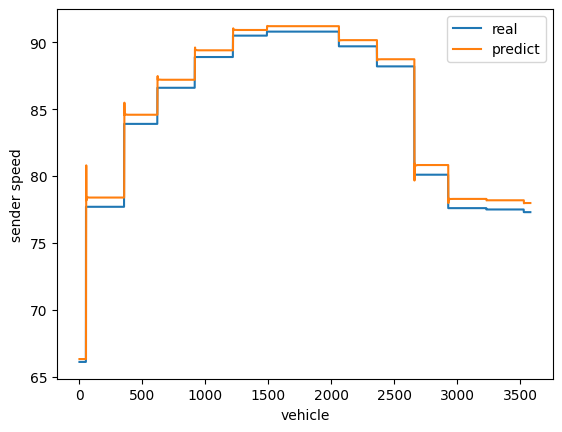

In [ ]:
close_predicted=scaler.inverse_transform(test_predictions).reshape(-1,1)
def prediction_plot(close_predicted):
    fig, ax = plt.subplots()
    ax.plot(np.arange(len(close_predicted)),scaler.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
    ax.plot(np.arange(len(close_predicted)),close_predicted, label="Prediction")
    ax.legend(['real','predict'])
    plt.xlabel('vehicle')
    plt.ylabel('sender speed')
prediction_plot(close_predicted)

Text(0.5, 1.0, 'MAE for LSTM')

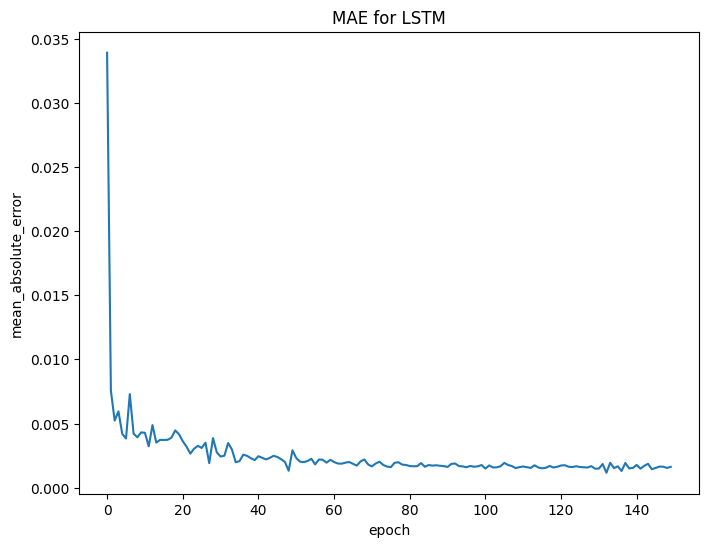

In [ ]:
import matplotlib.pyplot as plt
fig , ax =plt.subplots(figsize=(8,6))
ax.plot(history.history['mean_absolute_error'],label='mean_absolute_error')
plt.xlabel('epoch')
plt.ylabel('mean_absolute_error')
plt.title('MAE for LSTM')

{'LSTM': 33.43, 'GRU ': 18.35, 'BiLSTM': 42.48}


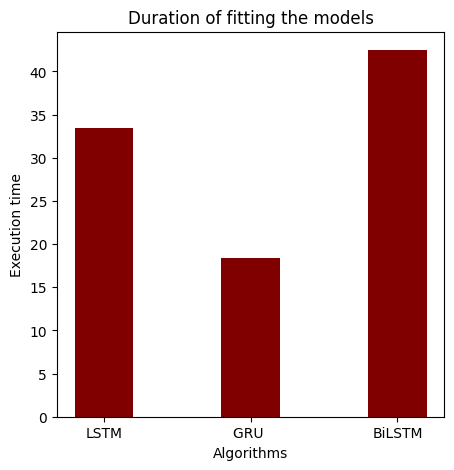

In [4]:
#fitting time of different algorithms in phase 2
data = {'LSTM':np.round(2006.03/60,2),
        "GRU ":np.round(1405.70/60,2),
        'BiLSTM':np.round(2548.51/60,2)}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.4)
plt.xlabel('Algorithms')
plt.ylabel("Execution time")
plt.title("Duration of fitting the models")
print(data)
plt.show()
